In [125]:
############Question 1###########

#libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from math import*
from pylab import *

data = pd.read_csv("data6_1.csv")



def split(x):
    compt=0
    a,b=(len(x)*3)//4,len(x)-(len(x)*3)//4
    training=np.zeros(a)
    testing=np.zeros(b)
    tr=0
    te=0
    while(compt<len(x)):
        if(compt%4==0):
            testing[te]=x[compt]
            te+=1
        else:
            training[tr]=x[compt]
            tr+=1
        compt+=1
    return training,testing


#splitting the data
x_training,x_testing=split(data.x)
y_training,y_testing=split(data.y)



#features
#we have two features x,y
print("The number of features is",len(list(data)))
print(data.keys())


#training examples
print("\nTraining examples :")
print(len(x_training))

#testing examples
print("\nTesting examples :")
print(len(x_testing))

#mean/median/min/max for each feature
print(data.describe())

The number of features is 2
Index(['x', 'y'], dtype='object')

Training examples :
142

Testing examples :
48
                x           y
count  190.000000  190.000000
mean     9.450000   22.068118
std      5.499242   11.291545
min      0.000000    1.293861
25%      4.725000   12.463135
50%      9.450000   22.824738
75%     14.175000   31.364510
max     18.900000   44.383901


142


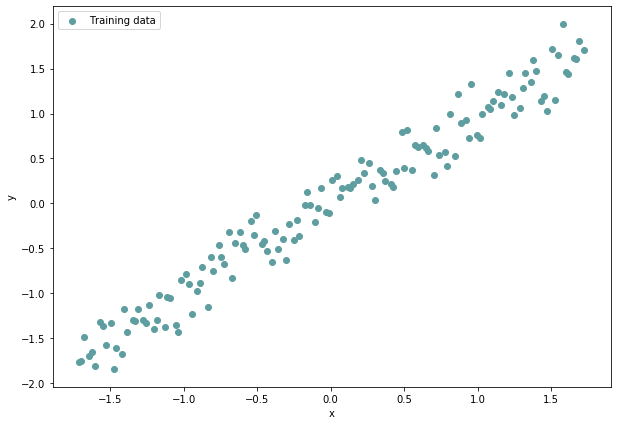

In [126]:
############Question 2###########




#normalization of training data



#### normalization ###
def normalize_x(vect):
    X = np.zeros(len(x_training))
    for i in range (len(vect)):
        X[i] = (vect[i] - np.mean(x_training))/ (sqrt(np.var(x_training)))
    return X


def normalize_y(vect):
    Y = np.zeros(len(y_training))
    for i in range (len(vect)):
        Y[i] = (vect[i] - np.mean(y_training))/ (sqrt(np.var(y_training)))
    return Y


x = normalize_x(x_training)
y = normalize_y(y_training)

#represent the training data
fig = plt.figure(2, figsize=(10, 7),)
plt.scatter(x, y ,c = 'cadetblue', label = 'Training data')
legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [127]:
############Question 5###########

'''linear regression'''


m = len(x_training)


#### Hypothesis function ####
def reg_function(b,w,x):
    return b + w*x


### empirical error ###
def empirical_error(x,y,b,w):
    j = (1/m) * sum(((x*w+b) - y)**2)
    return j


### cost function ###
def cost(x,y,b,w):
    j = (1/(2*m)) * sum(((x*w+b) - y)**2)
    return j


### gradient descent ###
def gradient_descent(x,y,rate,precision,n):
    b=0
    w=0
    d=np.array([[sum((x*w+b)-y)/n],[sum(((x*w+b)-y)*x)/n]])
    while(np.linalg.norm(d)>precision):
        #print(np.linalg.norm(d))
        b-= rate*sum((x*w+b)-y)/n
        w-= rate*sum(((x*w+b)-y)*x)/n
        d[0] = [sum((x*w+b)-y)/n]
        d[1] = [sum(((x*w+b)-y)*x)/n]
    return b,w


### armijo
def gradient_descent_armijo(x,y,precision,n):
    b=0
    w=0
    d=np.array([[sum((x*w+b)-y)/n],[sum(((x*w+b)-y)*x)/n]])
    while(np.linalg.norm(d)>precision):
        d[0] = [sum((x*w+b)-y)/n]
        d[1] = [sum(((x*w+b)-y)*x)/n]
        rate=Armijo_(x,y,w,b,d,n,precision)
        b-= rate*sum((x*w+b)-y)/n
        w-= rate*sum(((x*w+b)-y)*x)/n  
    return b,w




### result's plot ###
def plot():
    fig = plt.figure(2, figsize=(10, 7))
    plt.scatter(x, y ,c = 'lightcoral',label="training data")
    line_x = [-1.8,1.8]
    line_y = [reg_function(b,w,line_x[0]),reg_function(b,w,line_x[1])]
    plt.plot(line_x,line_y,c='darkslategrey',label="model")
    legend(loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

the parameters : 7.775861331978456e-16 and 0.9807947860745417 

the empirical value : 0.03609008073334858 



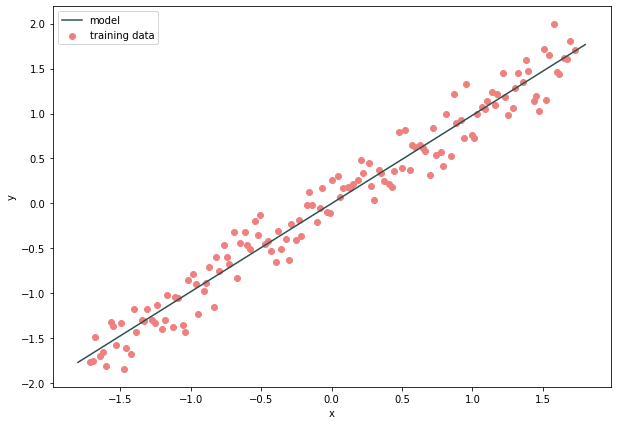

In [128]:
#rate=0.01
rate=0.01
b,w=gradient_descent(x,y,rate,0.001,m)
print("the parameters :",b,"and",w,"\n")
print("the empirical value :",empirical_error(x,y,b,w),"\n")
plot()

the parameters : 7.781099708221455e-16 and 0.9808093971759085 

the empirical value : 0.03609005187483413 



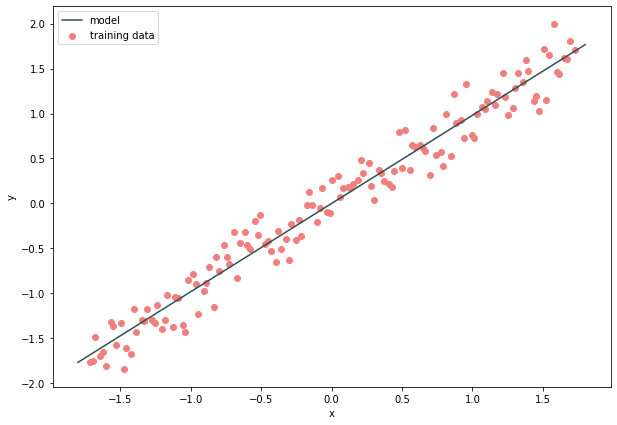

In [129]:
##rate=0.02
rate=0.02
b,w=gradient_descent(x,y,rate,0.001,m)
print("the parameters :",b,"and",w,"\n")
print("the empirical value :",empirical_error(x,y,b,w),"\n")
plot()

the parameters : 7.773124866776994e-16 and 0.980814202494428 

the empirical value : 0.036090042477109466 



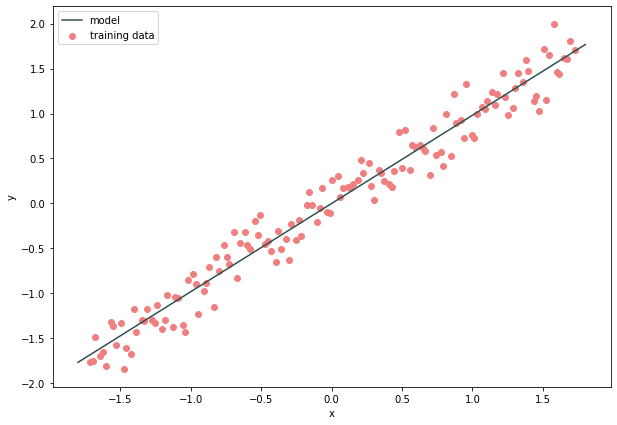

In [130]:
##rate=0.03
rate=0.03
b,w=gradient_descent(x,y,rate,0.001,m)
print("the parameters :",b,"and",w,"\n")
print("the empirical value :",empirical_error(x,y,b,w),"\n")
plot()


In [131]:
## armijo ##
def Armijo_(x,y,w,b,d,n,prec):
    alpha=1
    while(cost(x,y,b-(alpha*d[0]),w-(alpha*d[1]))-cost(x,y,b,w)>-alpha*prec*np.dot(d.T,d)):
        alpha/=2
        b,w=b-(alpha*d[0]),w-(alpha*d[1])
    return alpha


The parameters : 4.503439874535846e-16 and 0.9817896460102554 

The empirical value : 0.036089090987056885 



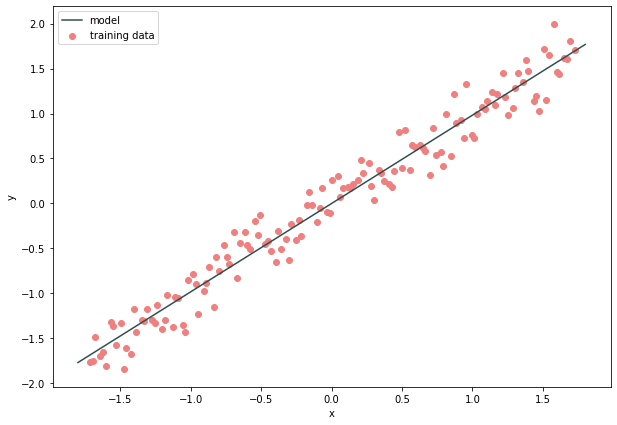

In [132]:
b,w=gradient_descent_armijo(x,y,0.001,m)
print("The parameters :",b,"and",w,"\n")
print("The empirical value :",empirical_error(x,y,b,w),"\n")
plot()

For a rate = 0.02

The generalization error : 0.009721665119457594


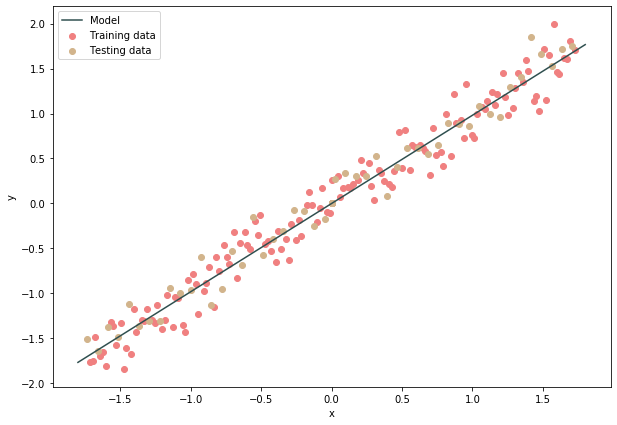

In [180]:
#generalization error

def generalization_error(Yhat,y):
    s=0
    for i in range(len(y)):
        s = s + (1/len(y))*(pow((Yhat[i]-y[i]),2))
    return s


#### normalization of our testing data ####
x_t = normalize_x(x_testing)
y_t = normalize_y(y_testing)


#evaluate the testing dataset with rate=0.02

#predicted values
def predicted_values(b,w):
    Y_predict = []
    for i in range(len(x_t)):
        Y_predict.append(reg_function(b,w,x_t[i]))
    return Y_predict

#plot
def plot_test():
    fig = plt.figure(figsize=(10, 7),)
    plt.scatter(x, y ,c = 'lightcoral',label="Training data")
    plt.scatter(x_t, y_t ,c = 'tan',label="Testing data")
    line_x = [-1.8,1.8]
    line_y = [reg_function(b,w,line_x[0]),reg_function(b,w,line_x[1])]
    plt.plot(line_x,line_y,c='darkslategrey',label="Model")
    legend(loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
rate=0.02
b,w=gradient_descent(x,y,rate,0.001,m)


s = generalization_error(predicted_values(b,w),y_t)
print("For a rate = 0.02\n")
print("The generalization error :",s)

plot_test()

the parameters : 7.775861331978456e-16 and 0.9807947860745417 

For a rate = 0.01

The generalization error : 0.009721597017955054


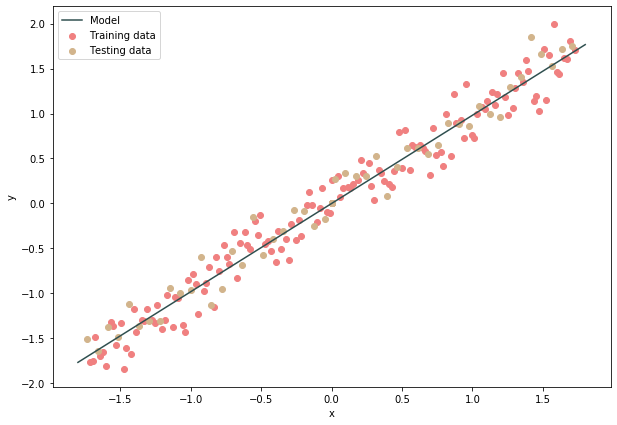

In [181]:
#evaluate the testing dataset with rate=0.01

rate=0.01
b,w=gradient_descent(x,y,rate,0.001,m)

print("the parameters :",b,"and",w,"\n")

s1 = generalization_error(predicted_values(b,w),y_t)
print("For a rate = 0.01\n")
print("The generalization error :",s1)

plot_test()


the parameters : 7.773124866776994e-16 and 0.980814202494428 

For a rate = 0.03

The generalization error : 0.009721687549197095


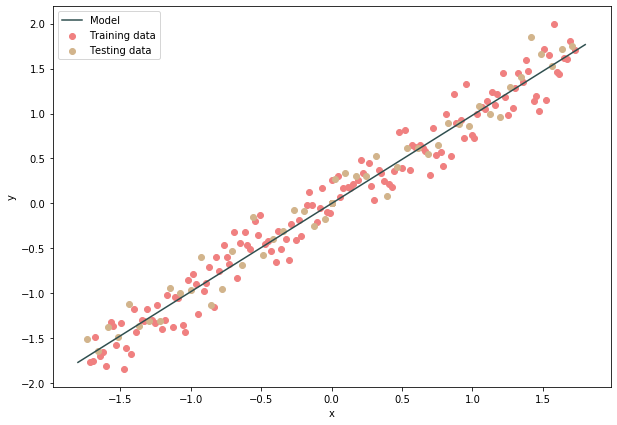

In [182]:
#evaluate the testing dataset with rate=0.03

rate=0.03
b,w=gradient_descent(x,y,rate,0.001,m)

print("the parameters :",b,"and",w,"\n")

s1 = generalization_error(predicted_values(b,w),y_t)
print("For a rate = 0.03\n")
print("The generalization error :",s1)

plot_test()



The parameters : 4.503439874535846e-16 and 0.9817896460102554 

The generalization error : 0.00972657292999605


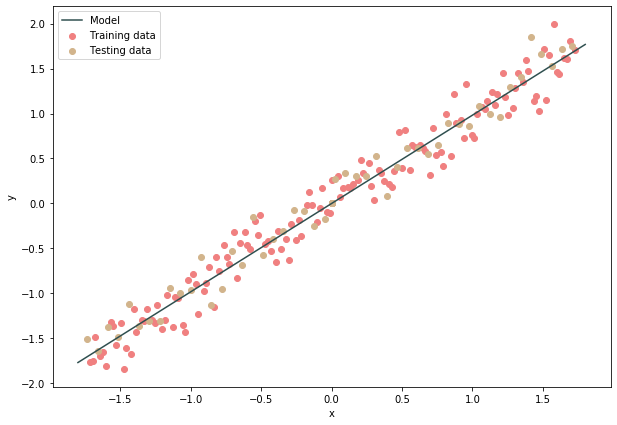

In [183]:
#evaluate the testing dataset with Armijo rate
b,w = gradient_descent_armijo(x,y,0.001,m)
s1 = generalization_error(predicted_values(b,w),y_t)
print("The parameters :",b, "and", w,"\n")
print("The generalization error :",s1)

plot_test()



In [190]:
#### function to calculate the accuracy #####
def rsquared(rate):
    Y_predi = []
    if rate == 'armijo':
        b,w = gradient_descent_armijo(x,y,0.001,m)
    else :
        b,w = gradient_descent(x,y,rate,0.001,m)
    for i in range(len(y)):
        Y_predi.append(reg_function(b,w,x[i]))
    mse = sum((y-Y_predi)**2)
    mae = sum((y-np.mean(y))**2)
    return 1 - (1/len(y))*(mse/mae)


#### accuracy ####
#### for rate = 0.01
print("The accuracy for rate = 0.01 :")
print(rsquared(0.01),"\n")

#### for rate = 0.02
print("The accuracy for rate = 0.02 :")
print(rsquared(0.02),"\n")

#### for rate = 0.03
print("The accuracy for rate = 0.03 :")
print(rsquared(0.02),"\n")


#### for the armijo learning rate
print("The accuracy using the armijo learning rate :")
print(rsquared('armijo'),"\n")


The accuracy for rate = 0.01 :
0.9997458445018779 

The accuracy for rate = 0.02 :
0.9997458447051069 

The accuracy for rate = 0.03 :
0.9997458447051069 

The accuracy using the armijo learning rate :
0.9997458514719222 

